In [2]:
import numpy as np
import matplotlib.pyplot as plt
from fqs import *
import copy
import os
import pickle

In [3]:
import pandas as pd
import seaborn as sns

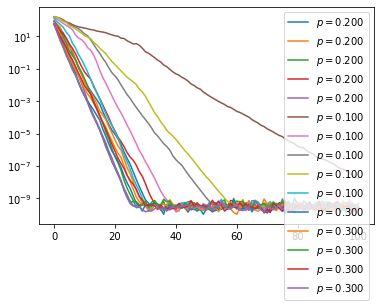

In [4]:
m = 100
n = 50
k = 2

ps = []
seed = []
iteration = []
method = []
fvals = []
etaLst=[]

for case in range(3):
    if case == 0:
        p = 0.2; etas = [2**-16,2**-17,2**-18]
    if case == 1:
        p = 0.1; etas = [2**-18,2**-19,2**-20]
#     p = 0.05; etas = [2**-19]
    if case == 2:
        p = 0.3; etas = [2**-16,2**-17,2**-18]


    for SEED in range(5):

        np.random.seed(SEED)
        Us = np.random.randn(m,k)
        VTs = np.random.randn(k,n)

        prefix = "./logs/matrix_completition_%d_%d_%d_%f_SEED_%d_"%(m,n,k,p, SEED)

        for eta in etas:


            logfile = "%s_SVDApproach_eta_%2.5e_.pkl"%(prefix,eta)

#             if os.path.exists(logfile):
            [fval,U,V] = pickle.load( open(logfile,"rb"))

            for it, fv in enumerate(fval):
                ps.append(p)
                seed.append(SEED)
                iteration.append(it)
                method.append("Non-Convex SGD")
                fvals.append(fv)
                etaLst.append(r'$2^{%d}$'%int(np.round(np.log2(eta))))
            
    
        logfile = "%s_SPS_v5_Approach.pkl"%(prefix)

        [fval,U,V] = pickle.load( open(logfile,"rb"))
        plt.semilogy(fval, label = r'$p = %1.3f$'%p)
        for it, fv in enumerate(fval):
            ps.append(p)
            seed.append(SEED)
            iteration.append(it)
            method.append("SP2")
            fvals.append(fv)
            etaLst.append("none")

    

        
plt.legend()

In [5]:

df = pd.DataFrame({"fval":fvals,"step-size":etaLst, "it":iteration, "p":ps, "SEED":seed,"method":method})
df



,fval,step-size,it,p,SEED,method
0,8.098257e+01,$2^{-16}$,0,0.2,0,Non-Convex SGD
1,4.297517e+01,$2^{-16}$,1,0.2,0,Non-Convex SGD
2,1.850941e+01,$2^{-16}$,2,0.2,0,Non-Convex SGD
3,8.357726e+00,$2^{-16}$,3,0.2,0,Non-Convex SGD
4,3.925130e+00,$2^{-16}$,4,0.2,0,Non-Convex SGD
...,...,...,...,...,...,...
10555,2.615322e-10,none,96,0.3,4,SP2
10556,1.239693e-10,none,97,0.3,4,SP2
10557,4.975172e-10,none,98,0.3,4,SP2
10558,2.285442e-10,none,99,0.3,4,SP2


In [ ]:
# import matplotlib 
# matplotlib.rc('xtick', labelsize=40) 
# matplotlib.rc('ytick', labelsize=40) 

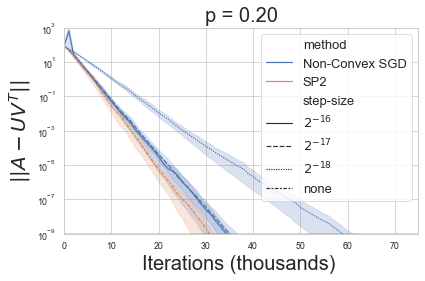

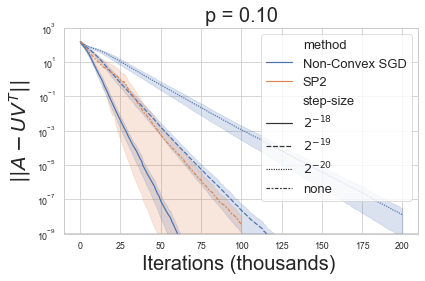

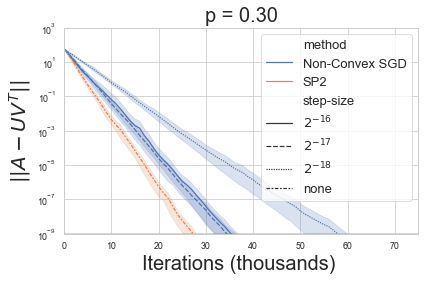

In [18]:
# sns.set(font_scale = 1.2)
sns.set_context('paper')
sns.set_style("whitegrid")


for p in set(df.p):

    g = sns.lineplot(x="it", y="fval",
                 style="step-size",
                 hue="method",  
                 data=df[df.p == p])
    g.set(yscale="log") 
    plt.grid(True)
    plt.title("p = %1.2f"%p,fontsize=20)
    plt.ylim([1e-9,1e3])
    if p == 0.2:
        plt.xlim([0,75])
    if p == 0.3:
        plt.xlim([0,75])
        
    plt.xlabel("Iterations (thousands) ",fontsize=20)
    plt.ylabel(r'$|| A - U V^T||$',fontsize=20)
    plt.tight_layout()
    plt.savefig("./figures/MatrixCompletition_Toy_%d.pdf"%int(10*p))
#     .savefig("output.png")
    plt.legend(fontsize=13)

    plt.show()
#     sadasa
     

